In [1]:
#After we have done the EDA, we will move onto linear regression and finding out the autocorrelation between 
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression

# pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# yahoo finance is used to fetch data
import yfinance as yf

In [2]:
# Read data
Df = yf.download('^NSEI', '2010-01-01', '2019-01-01', auto_adjust=True) #After GFC and before pandemic
Df
#What do I conclude
#That if the dataset is between 2010 and 2019 then it has a better estimate with R^2 of 83%
#If its between 2008 and 2022 then the R^2 decreases
#Similarly we can make observations for GFC and post pandemic time

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,0
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,0
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,0
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,0
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,0
...,...,...,...,...,...
2018-12-24,10780.900391,10782.299805,10649.250000,10663.500000,223400
2018-12-26,10635.450195,10747.500000,10534.549805,10729.849609,263700
2018-12-27,10817.900391,10834.200195,10764.450195,10779.799805,456100


In [3]:
# Df['Prev_Close_1D'] = Df['Close'].shift(1)# this is the previous close
# Df['Prev_Close_2D'] = Df['Close'].shift(2)
# Df['Prev_Close_3D'] = Df['Close'].shift(3)
# Df['Prev_Close_4D'] = Df['Close'].shift(4)
# Df['Prev_Close_5D'] = Df['Close'].shift(5)
# Df=Df.dropna()
# close=np.array(Df[['Close']])
# prev_close_1D=np.array(Df[['Prev_Close_1D']])
# prev_close_2D=np.array(Df[['Prev_Close_2D']])
# prev_close_3D=np.array(Df[['Prev_Close_3D']])
# prev_close_4D=np.array(Df[['Prev_Close_4D']])
# prev_close_5D=np.array(Df[['Prev_Close_5D']])

#Method 1
#Returns_iD is close- prev_close_iD/prev_close_iD*100
# Df['Returns_1D']=(close-prev_close_1D)/prev_close_1D*100
# Df['Returns_2D']=(close-prev_close_2D)/prev_close_2D*100
# Df['Returns_3D']=(close-prev_close_3D)/prev_close_3D*100
# Df['Returns_4D']=(close-prev_close_4D)/prev_close_4D*100
# Df['Returns_5D']=(close-prev_close_5D)/prev_close_5D*100

#Method 2 - The best one yet
Df['Returns_1D'] = Df['Close'].pct_change(periods=1)*100
Df['Returns_2D'] = Df['Close'].pct_change(periods=2)*100
Df['Returns_3D'] = Df['Close'].pct_change(periods=3)*100
Df['Returns_4D'] = Df['Close'].pct_change(periods=4)*100
Df['Returns_5D'] = Df['Close'].pct_change(periods=5)*100

#Method 3 
# Df['Rolling_Returns_2D'] = Df['Returns_1D'].rolling(window=2).sum()
# Df['Rolling_Returns_3D'] = Df['Returns_1D'].rolling(window=3).sum()   THIS IS FOR ROLLING RETURNS
# Df['Rolling_Returns_4D'] = Df['Returns_1D'].rolling(window=4).sum()
# Df['Rolling_Returns_5D'] = Df['Returns_1D'].rolling(window=5).sum()
Df=Df.dropna()
Df.drop(['Open','High','Low','Volume'],axis=1,inplace=True)
Df

C:\Users\Dishay Mehta\AppData\Local\Temp\ipykernel_10308\295909602.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df.drop(['Open','High','Low','Volume'],axis=1,inplace=True)


,Close,Returns_1D,Returns_2D,Returns_3D,Returns_4D,Returns_5D
Date,,,,,,
2010-01-11,5249.399902,0.088658,-0.260307,-0.613425,-0.539988,0.328728
2010-01-12,5210.399902,-0.742942,-0.654943,-1.001315,-1.351810,-1.278918
2010-01-13,5233.950195,0.451986,-0.294314,-0.205916,-0.553854,-0.905934
2010-01-14,5259.899902,0.495796,0.950023,0.200023,0.288858,-0.060804
2010-01-15,5252.200195,-0.146385,0.348685,0.802247,0.053345,0.142051
...,...,...,...,...,...,...
2018-12-24,10663.500000,-0.841547,-2.631557,-2.770051,-2.247749,-2.065048
2018-12-26,10729.849609,0.622212,-0.224571,-2.025718,-2.165074,-1.639522
2018-12-27,10779.799805,0.465526,1.090634,0.239909,-1.569623,-1.709628


In [12]:
#Making a simple linear regression model
X1 = Df[['Returns_4D']] #Exploratory variable
y1 = Df['Returns_5D'] #Dependent variable

In [14]:
# Split the data into train and test dataset
t = .8
t = int(t*len(Df))

# Train dataset
X1_train = X1[:t]
y1_train = y1[:t]

# Test dataset
X1_test = X1[t:]
y1_test = y1[t:]

In [15]:
# Create a linear regression model
linear = LinearRegression().fit(X1_train, y1_train)
print("Linear Regression model")
print("Returns_5D(y) = %.2f * Returns_4D(x1) \
+ %.2f (constant)" % (linear.coef_[0],linear.intercept_))

Linear Regression model
Returns_5D(y) = 1.00 * Returns_4D(x1) + 0.04 (constant)


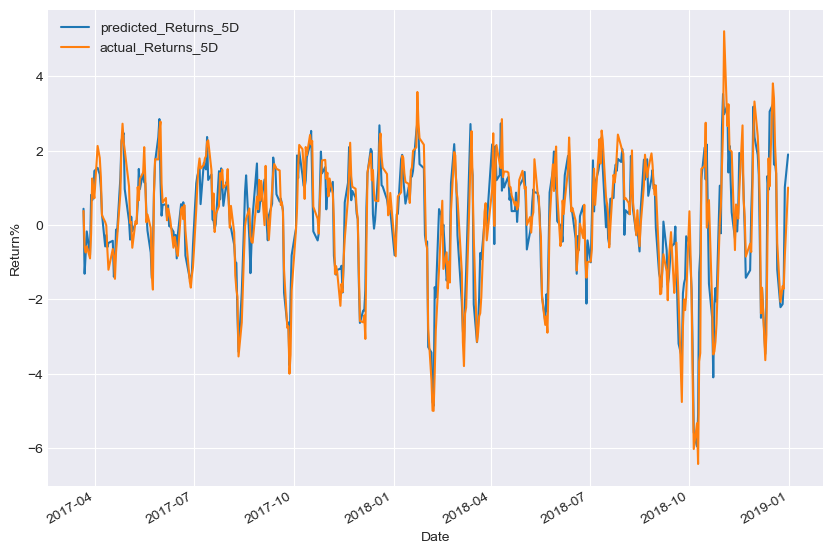

In [16]:
predicted_Returns_5D_1 = linear.predict(X1_test)
predicted_Returns_5D_1 = pd.DataFrame(
    predicted_Returns_5D_1, index=y1_test.index, columns=['price'])
predicted_Returns_5D_1.plot(figsize=(10, 7))
y1_test.plot()
plt.legend(['predicted_Returns_5D', 'actual_Returns_5D'])
plt.ylabel("Return%")
plt.show()

In [17]:
# R square
r2_score = linear.score(X1[t:], y1[t:])*100
float("{0:.2f}".format(r2_score))

82.32

In [18]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(y1_test,predicted_Returns_5D_1))
print("RMSE: ", rms)


RMSE:  0.7123817378779596


In [20]:
#Making a simple linear regression model
X2 = Df[['Returns_3D','Returns_4D']] #Exploratory variable
y2 = Df['Returns_5D'] #Dependent variable

In [21]:
# Split the data into train and test dataset
t = .8
t = int(t*len(Df))

# Train dataset
X2_train = X2[:t]
y2_train = y2[:t]

# Test dataset
X2_test = X2[t:]
y2_test = y2[t:]

In [22]:
# Create a linear regression model
linear = LinearRegression().fit(X2_train, y2_train)
print("Linear Regression model")
print("Returns_5D(y) = %.2f * Returns_3D(x1) \
+ %.2f * Returns_4D(x2)) \
+ %.2f (constant)" % (linear.coef_[0],linear.coef_[1],linear.intercept_))

Linear Regression model
Returns_5D(y) = -0.09 * Returns_3D(x1) + 1.07 * Returns_4D(x2)) + 0.04 (constant)


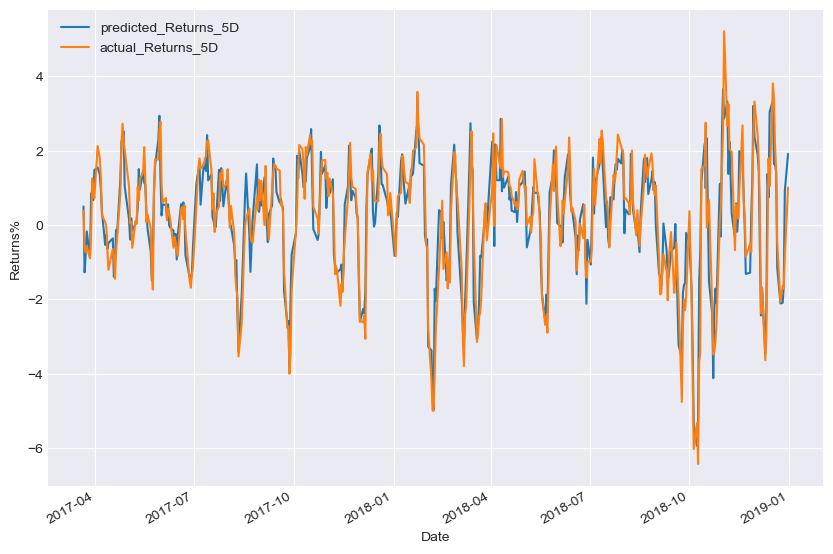

In [23]:
predicted_Returns_5D_2 = linear.predict(X2_test)
predicted_Returns_5D_2 = pd.DataFrame(
    predicted_Returns_5D_2, index=y2_test.index, columns=['price'])
predicted_Returns_5D_2.plot(figsize=(10, 7))
y2_test.plot()
plt.legend(['predicted_Returns_5D', 'actual_Returns_5D'])
plt.ylabel("Returns%")
plt.show()

In [24]:
# R square
r2_score = linear.score(X2[t:], y2[t:])*100
float("{0:.2f}".format(r2_score))

82.31

In [25]:
rms = sqrt(mean_squared_error(y2_test,predicted_Returns_5D_2))
print("RMSE: ", rms)

RMSE:  0.7126889995548554


In [26]:
four_day=np.array(Df['Returns_4D'])
three_day=np.array(Df['Returns_3D'])
interactive=four_day*three_day
Df['Interactive_term']=interactive
#I am not sure if this a good idea since we are multiplying the returns and most probably the signs will get inverted but lets see

C:\Users\Dishay Mehta\AppData\Local\Temp\ipykernel_10308\1225778145.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['Interactive_term']=interactive


In [27]:
#Making a simple linear regression model
X3 = Df[['Returns_3D','Returns_4D','Interactive_term']] #Exploratory variable
y3 = Df['Returns_5D'] #Dependent variable

In [28]:
# Split the data into train and test dataset
t = .8
t = int(t*len(Df))

# Train dataset
X3_train = X3[:t]
y3_train = y3[:t]

# Test dataset
X3_test = X3[t:]
y3_test = y3[t:]

In [29]:
# Create a linear regression model
linear = LinearRegression().fit(X3_train, y3_train)
print("Linear Regression model")
print("Returns_5D(y) = %.2f * Returns_3D(x1) \
+ %.2f * Returns_4D(x2)) \
+ %.2f * Interactive_term(x1*x2)) \
+ %.2f (constant)" % (linear.coef_[0],linear.coef_[1],linear.coef_[2],linear.intercept_))

Linear Regression model
Returns_5D(y) = -0.09 * Returns_3D(x1) + 1.07 * Returns_4D(x2)) + -0.02 * Interactive_term(x1*x2)) + 0.09 (constant)


In [30]:
#From the above result we can conclude that interactive term is useless for durattion 2008-2022 but during 2010 and 2019 it has some coeff

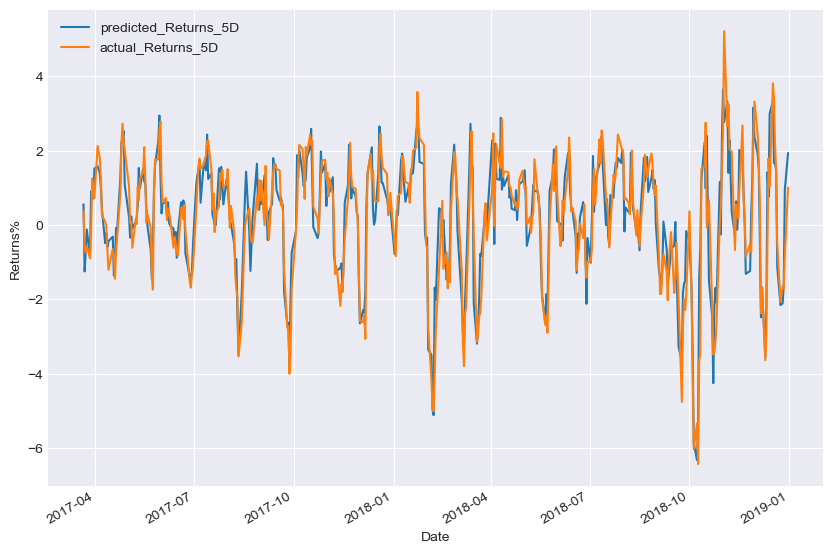

In [31]:
predicted_Returns_5D_3 = linear.predict(X3_test)
predicted_Returns_5D_3 = pd.DataFrame(
    predicted_Returns_5D_3, index=y3_test.index, columns=['price'])
predicted_Returns_5D_3.plot(figsize=(10, 7))
y3_test.plot()
plt.legend(['predicted_Returns_5D', 'actual_Returns_5D'])
plt.ylabel("Returns%")
plt.show()

In [32]:
# R square
r2_score = linear.score(X3[t:], y3[t:])*100
float("{0:.2f}".format(r2_score))

82.32

In [33]:
rms = sqrt(mean_squared_error(y3_test,predicted_Returns_5D_3))
print("RMSE: ", rms)

RMSE:  0.7123282842551057


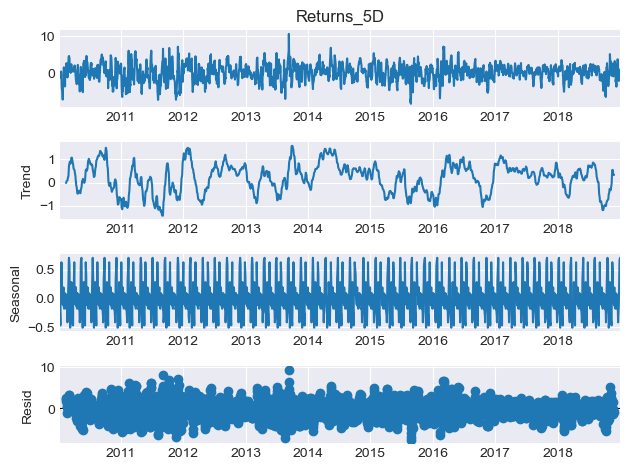

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
#This is a naive decomposition
decompose = seasonal_decompose(Df['Returns_5D'],model='additive',period=48)
decompose.plot()
plt.show()

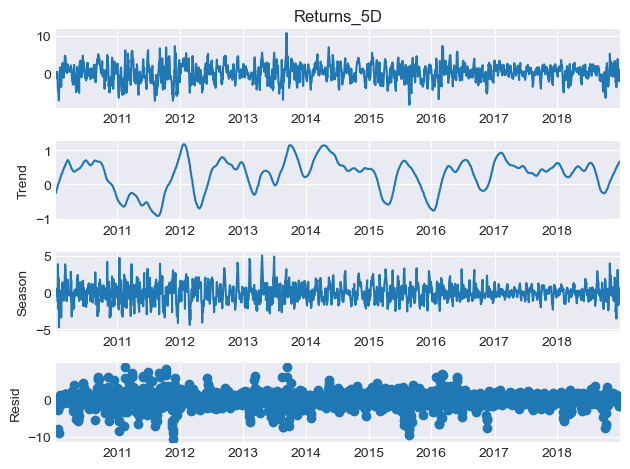

In [35]:
from statsmodels.tsa.seasonal import STL
#STL decomposition is better. STL stands for seasonal trend decomposition
res = STL(Df['Returns_5D'],robust=True,period=48).fit()
res.plot()
plt.show()

In [36]:
#Testing auto-correlation
values5 = pd.DataFrame(Df.Returns_5D)
values4 = pd.DataFrame(Df.Returns_4D)
values3 = pd.DataFrame(Df.Returns_3D)
values2 = pd.DataFrame(Df.Returns_2D)
values = pd.DataFrame(Df.Returns_1D)
# using shift function to shift the values.
dataframe = pd.concat([values,values2,values3,values4,values5], axis=1)
# naming the columns
dataframe.columns = ['y_1D', 'y_2D','y_3D','y_4D','y_5D']
 
# using corr() function to compute the correlation
result = dataframe.corr()
print(result)

          y_1D      y_2D      y_3D      y_4D      y_5D
y_1D  1.000000  0.730225  0.585533  0.498182  0.434118
y_2D  0.730225  1.000000  0.831887  0.710864  0.624516
y_3D  0.585533  0.831887  1.000000  0.876413  0.773590
y_4D  0.498182  0.710864  0.876413  1.000000  0.900889
y_5D  0.434118  0.624516  0.773590  0.900889  1.000000


In [37]:
Df

,Close,Returns_1D,Returns_2D,Returns_3D,Returns_4D,Returns_5D,Sign,Interactive_term
Date,,,,,,,,
2010-01-11,5249.399902,0.088658,-0.260307,-0.613425,-0.539988,0.328728,1.0,0.331242
2010-01-12,5210.399902,-0.742942,-0.654943,-1.001315,-1.351810,-1.278918,-1.0,1.353587
2010-01-13,5233.950195,0.451986,-0.294314,-0.205916,-0.553854,-0.905934,-1.0,0.114048
2010-01-14,5259.899902,0.495796,0.950023,0.200023,0.288858,-0.060804,-1.0,0.057778
2010-01-15,5252.200195,-0.146385,0.348685,0.802247,0.053345,0.142051,1.0,0.042796
...,...,...,...,...,...,...,...,...
2018-12-24,10663.500000,-0.841547,-2.631557,-2.770051,-2.247749,-2.065048,-1.0,6.226379
2018-12-26,10729.849609,0.622212,-0.224571,-2.025718,-2.165074,-1.639522,-1.0,4.385831
2018-12-27,10779.799805,0.465526,1.090634,0.239909,-1.569623,-1.709628,-1.0,-0.376567


In [38]:
#Another way to find auto correlation is below
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [39]:
# Calculate autocorrelation
acf_values = acf(Df['Returns_5D'])
np.round(acf_values,3)

array([ 1.   ,  0.812,  0.592,  0.373,  0.152, -0.036, -0.032, -0.022,
       -0.008,  0.012,  0.012, -0.002, -0.002, -0.01 , -0.018, -0.012,
        0.   , -0.   , -0.008, -0.024, -0.054, -0.08 , -0.088, -0.092,
       -0.09 , -0.074, -0.056, -0.052, -0.033, -0.011,  0.006,  0.008,
        0.008, -0.009])

In [40]:
# Calculate partial autocorrelation
pacf_values = pacf(Df['Returns_5D'])
np.round(pacf_values,3)

array([ 1.   ,  0.813, -0.2  , -0.13 , -0.165, -0.089,  0.412, -0.141,
       -0.061, -0.065, -0.084,  0.246, -0.067, -0.061, -0.033, -0.04 ,
        0.191, -0.083, -0.092, -0.042, -0.078,  0.16 , -0.022, -0.109,
       -0.026, -0.045,  0.156, -0.041, -0.038,  0.01 , -0.037,  0.077,
       -0.048, -0.068])

In [56]:
#Moving forward with binary classification to test if we can classify correctly whether the 5 day return is +ve or -ve
Df['Sign']= np.sign(Df['Returns_5D'])
Df.reset_index(drop=True)

C:\Users\Dishay Mehta\AppData\Local\Temp\ipykernel_10308\2217899262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['Sign']= np.sign(Df['Returns_5D'])


,Close,Returns_1D,Returns_2D,Returns_3D,Returns_4D,Returns_5D,Sign,Interactive_term
0,5249.399902,0.088658,-0.260307,-0.613425,-0.539988,0.328728,1.0,0.331242
1,5210.399902,-0.742942,-0.654943,-1.001315,-1.351810,-1.278918,-1.0,1.353587
2,5233.950195,0.451986,-0.294314,-0.205916,-0.553854,-0.905934,-1.0,0.114048
3,5259.899902,0.495796,0.950023,0.200023,0.288858,-0.060804,-1.0,0.057778
4,5252.200195,-0.146385,0.348685,0.802247,0.053345,0.142051,1.0,0.042796
...,...,...,...,...,...,...,...,...
2192,10663.500000,-0.841547,-2.631557,-2.770051,-2.247749,-2.065048,-1.0,6.226379
2193,10729.849609,0.622212,-0.224571,-2.025718,-2.165074,-1.639522,-1.0,4.385831
2194,10779.799805,0.465526,1.090634,0.239909,-1.569623,-1.709628,-1.0,-0.376567
2195,10859.900391,0.743062,1.212047,1.841800,0.984753,-0.838224,-1.0,1.813719


In [41]:

properties = list(Df.columns.values)
properties.remove('Interactive_term') #Uncomment or comment this according to need
properties.remove('Sign')
X=np.array(Df[properties])
a=np.array(Df['Sign'])
y=a.astype(int)